<a href="https://colab.research.google.com/github/Muthon1/DataScience/blob/main/Artificial_Neural_Network_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install keras
!pip install tensorflow
!pip install keras-tuner
!pip install keras-tuner --upgrade
!pip install future

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [49]:
#Import relevant libraries
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import keras_tuner as kt


In [8]:
data = pd.read_csv('/content/fashion-mnist_test.csv')

In [9]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Assuming the first column is the label and the rest are pixel values
y = data.iloc[:, 0].values  # Labels
x = data.iloc[:, 1:].values.reshape(-1, 28, 28)  # Reshape to image format

# Split into train and test sets (adjust split ratio as needed)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42 # Use x and y instead of x_test and y_test
)


In [21]:
# Construct a validation set from the last 10000 images and labels from
# train_and_validation_images and train_and_validation_labels
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [22]:
# Construct a training set from the first 50000 images and labels.
# Use x_train, which originally contained training and validation data
train_images = x_train[:50000, :, :]
train_labels = y_train[:50000] # Assuming you also need the labels

In [23]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
# Check if train_images is loaded and has the expected shape
print("Shape of train_images:", train_images.shape)

Shape of train_images: (0, 28, 28)


In [25]:
print("Shape of x_train:", x_train.shape)
train_images = x_train[:50000, :, :]
train_labels = y_train[:50000]

Shape of x_train: (0, 28, 28)


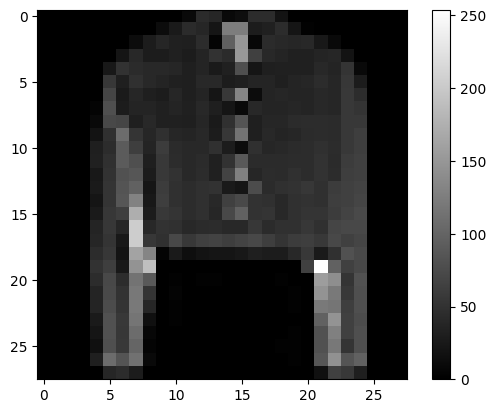

In [28]:
# Get the actual number of samples in x_train
num_samples = x_train.shape[0]

# Use the minimum between num_samples and 50000 to avoid exceeding the available data
train_images = x_train[:min(num_samples, 50000), :, :]
train_labels = y_train[:min(num_samples, 50000)]

# Generate a random index
random_index = np.random.randint(0, len(train_images))

# Display an image
plt.figure()
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()

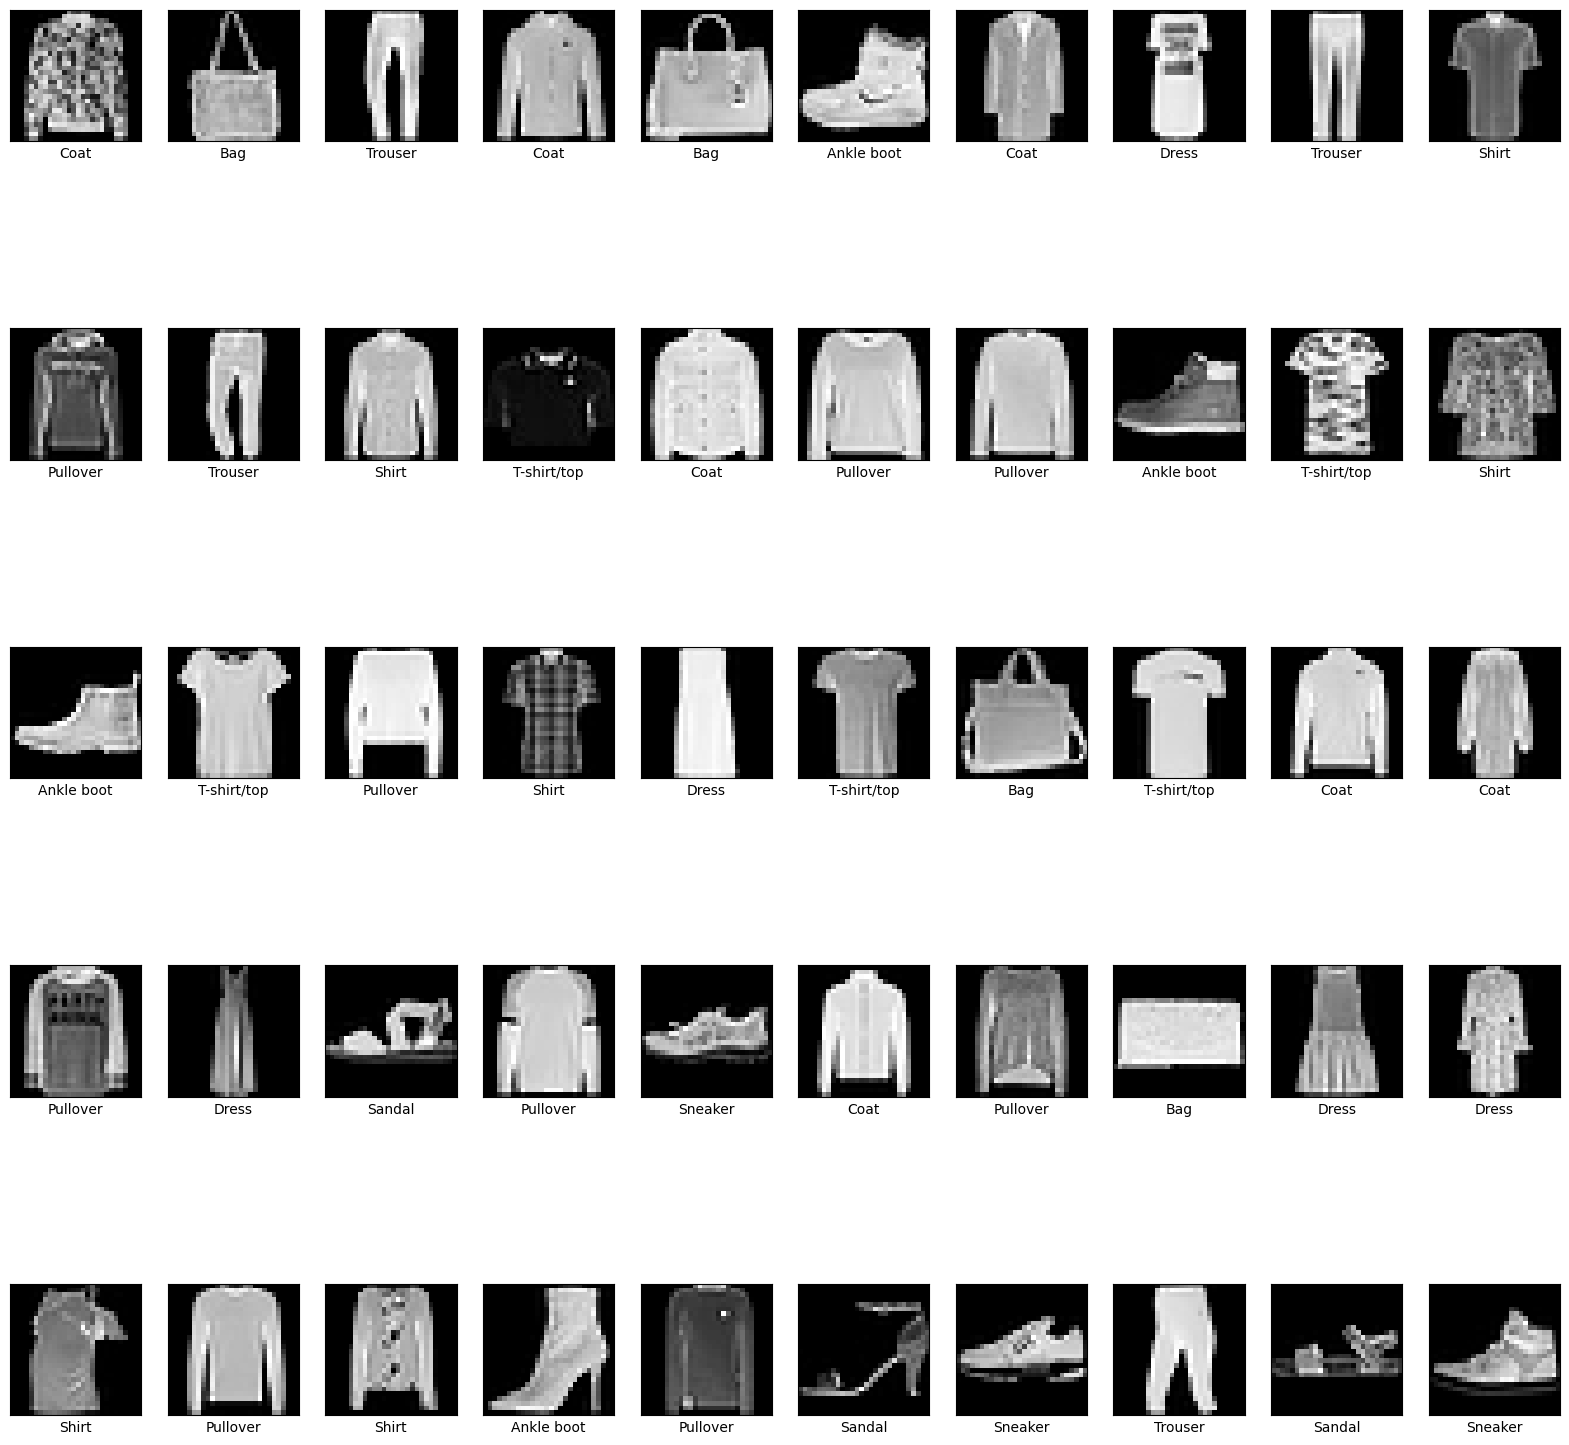

In [31]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    # Generate a random index within the bounds of train_images
    img_index = np.random.randint(0, len(train_images))

    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

In [42]:
# Preprocess
# Flatten

train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = None
test_images_flatten = None

In [43]:
# Normalize

train_images_model = train_images_flatten/255.
validation_images_model = None
test_images_model = None

In [44]:
# convert class vectors to binary class matrices
train_labels_categ = keras.utils.to_categorical(train_labels, 10)
# Assign y_val to validation_labels
validation_labels = y_val
validation_labels_categ = keras.utils.to_categorical(validation_labels, 10)
# Use y_test instead of test_labels
test_labels_categ = keras.utils.to_categorical(y_test, 10)

In [45]:
# Train
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a vector
    Dense(128, activation='relu'),  # First dense layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
# Ensure the model is properly defined
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Input layer: 28x28 grayscale images
    tf.keras.layers.Dense(128, activation='relu'),     # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer: 10 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [78]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels (train_labels should be integers from 0 to 9)
train_labels_categ = to_categorical(train_labels, 10)


In [74]:
# Reshape the train images to have a shape (num_samples, 28, 28, 1)
train_images_reshaped = train_images.reshape(train_images.shape[0], 28, 28, 1)


In [75]:
# Ensure images are of type float32
train_images_reshaped = train_images_reshaped.astype('float32')

# Normalize the pixel values to the range [0, 1]
train_images_reshaped = train_images_reshaped / 255.0


In [76]:
# Fit the model, capturing the history for potential debugging
history = model.fit(
    train_images_reshaped,
    train_labels_categ,
    epochs=5,
    batch_size=64
)

# Print a summary of the training history to check if training happened
print(history.history)


Epoch 1/5


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6179 - loss: 1.1375
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8071 - loss: 0.5685
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8422 - loss: 0.4712
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8551 - loss: 0.4258
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8626 - loss: 0.4047
{'accuracy': [0.7223749756813049, 0.8174999952316284, 0.8408750295639038, 0.8518750071525574, 0.8621249794960022], 'loss': [0.8237066864967346, 0.5463396310806274, 0.4765774607658386, 0.4364945590496063, 0.4079829454421997]}


In [81]:
# Evaluate the model
# Convert y_test to one-hot encoded format
y_test_categ = keras.utils.to_categorical(y_test, num_classes=10)

# Now evaluate with the one-hot encoded labels
test_loss, test_acc = model.evaluate(x_test, y_test_categ)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8218 - loss: 69.5729


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


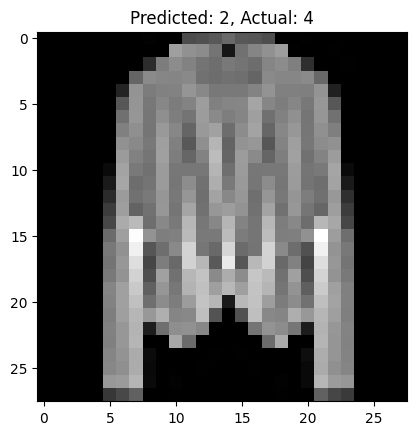

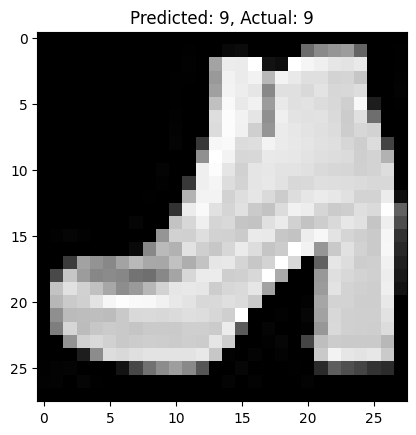

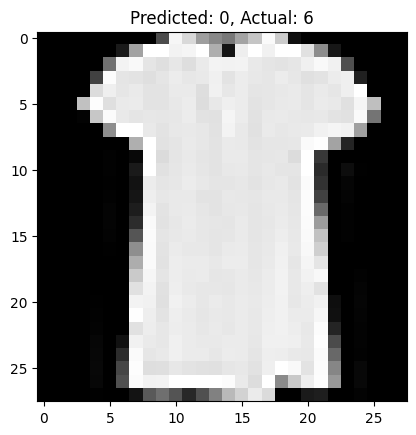

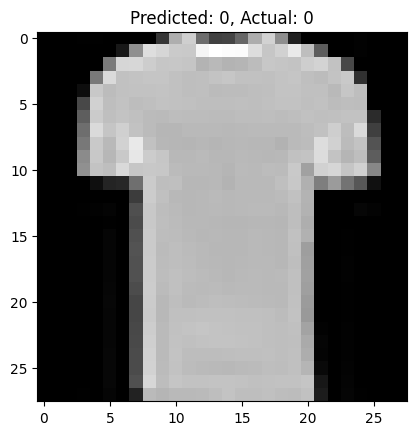

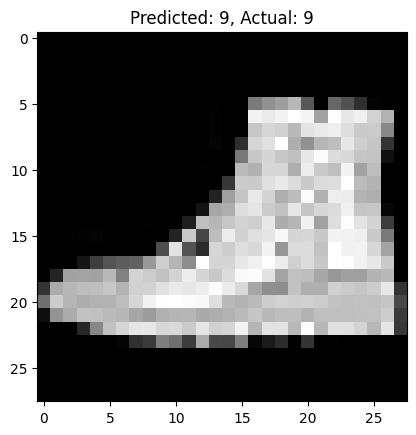

In [85]:
# Visualize the results
# Assuming x_test contains your test images and has shape (num_samples, 28, 28)
test_images = x_test

# Reshape and normalize test images similar to train images
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)  # Reshape for the model
test_images = test_images.astype('float32') / 255.0  # Normalize pixel values

predictions = model.predict(test_images)

# Plot the first 5 test images and their predictions
for i in range(5):
    plt.imshow(test_images[i, :, :, 0], cmap='gray') # Select the first channel for display
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}") # Use y_test for actual labels
    plt.show()